In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
from tensorflow.keras.datasets import imdb

In [3]:
max_features=10000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [4]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
words=imdb.get_word_index()

In [82]:
#words

In [7]:
word_index={index:word for word,index in words.items()}

In [84]:
#word_index

In [9]:
#In imdb dataset 0, 1, 2 are reserved for padding, start, and unknown tokens. Actual word indexing starts from 3
print(" ".join([word_index.get(i-3,'?') for i in X_train[0]]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
#Preprocessing

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
X_train=pad_sequences(X_train,maxlen=500)
X_test=pad_sequences(X_test,maxlen=500)

In [13]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
#Building model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Embedding,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [46]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [68]:
model=Sequential([
    Input(shape=(500,)),
    Embedding(max_features,128,input_length=500),
    SimpleRNN(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [70]:
model.compile(optimizer= Adam(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.5351 - loss: 0.6900 - val_accuracy: 0.5400 - val_loss: 0.6696
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7100 - loss: 0.5535 - val_accuracy: 0.8234 - val_loss: 0.3734
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8940 - loss: 0.2675 - val_accuracy: 0.8752 - val_loss: 0.3022
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9139 - loss: 0.2279 - val_accuracy: 0.8476 - val_loss: 0.3784
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9349 - loss: 0.1836 - val_accuracy: 0.8854 - val_loss: 0.3211
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9521 - loss: 0.1388 - val_accuracy: 0.8450 - val_loss: 0.3788
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9553 - loss: 0.1277 - val_accuracy: 0.8840 - val_loss: 0.3382
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9631 - loss: 0.1104 - 

In [76]:
loss=pd.DataFrame(history.history)
loss

,accuracy,loss,val_accuracy,val_loss
0,0.56755,0.683010,0.5400,0.669624
1,0.78530,0.455133,0.8234,0.373424
2,0.89380,0.267477,0.8752,0.302164
3,0.91545,0.223317,0.8476,0.378361
4,0.93500,0.182597,0.8854,0.321120
5,0.95000,0.142544,0.8450,0.378776
6,0.95445,0.131004,0.8840,0.338207
7,0.96450,0.105715,0.8832,0.330360


<Axes: >

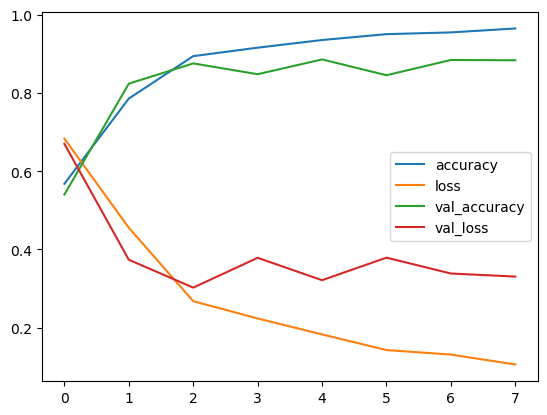

In [78]:
loss.plot()